In [1]:
#pandas for data analysis
import pandas as pd
#to scale data
from sklearn.preprocessing import StandardScaler
#to encode data (categorical to numerical)
from sklearn.preprocessing import LabelEncoder
#to plot data
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
import numpy
import re
import numpy as np

# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
bigModelData = pd.read_csv("stockData14.csv")
print(len(bigModelData))
bigModelData.dropna(inplace=True)
bigModelData = bigModelData.mask(bigModelData.eq('-')).dropna()
bigModelData.reset_index(drop=True, inplace=True)
print(len(bigModelData))
print(bigModelData.head())

186
24
  Stock Name    Date  Change           Sector Market Cap Zacks Ranks  \
0        FDS  June24  -2.75%       Technology     11.52B     3-Hold    
1        FDX  June25   2.53%         Services     42.73B     3-Hold    
2        GIS  June25  -4.45%   Consumer Goods     32.29B      2-Buy    
3       SCHN  June25   5.34%  Basic Materials    649.44M     3-Hold    
4        ACN  June26  -0.17%       Technology    123.54B     3-Hold    

  Yahoo Ranks The Street Ranks Investor Place  \
0        HOLD         A+ (Buy)              A   
1         BUY        C+ (Hold)              F   
2        HOLD         B- (Buy)              B   
3        HOLD          B (Buy)              D   
4         BUY          A (Buy)              B   

                            Company    ...    52W High 52W Low   ATR  Beta  \
0     FactSet Research Systems Inc.    ...      -3.95%  55.77%  5.61  1.04   
1                 FedEx Corporation    ...     -39.83%   3.52%  4.09  1.67   
2               General Mills, 

In [7]:
#Confusion matrix for later

import sklearn
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    #classes = ["\$0-\$5886", "\$5886-\$8062", "\$8062-\$12074", "\$12074-\$24000"]
    #[0, 5886, 8062, 12074, 24000]
    classes = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




#Convert market cap string (11.52M) to float (1.152e+10)
def suffix(damage):        
    if damage.endswith("B"):
        damage = float(damage[:-1]) * 1000000000
        return damage

    if damage.endswith("K"):
        damage = float(damage[:-1]) * 1000
        return damage

    if damage.endswith("M"):
        damage = float(damage[:-1]) * 1000000
        return damage

    return damage

for index, row in bigModelData.iterrows():
    mc = str(row['Market Cap'])
    mc = suffix(mc)
    outstanding = str(row['Outstanding'])
    outstanding = suffix(outstanding)
    f = str(row['Float'])
    f = suffix(f)
    avg = str(row['Avg Volume'])
    avg = suffix(avg)
    bigModelData.at[index, 'Market Cap'] = mc
    bigModelData.at[index, 'Outstanding'] = outstanding
    bigModelData.at[index, 'Float'] = f
    bigModelData.at[index, 'Avg Volume'] = avg


#Remove % signs for all relevant columns
bigModelData['EPS this Y'] = bigModelData['EPS this Y'].str[:-1]
bigModelData['EPS this Y'] = bigModelData['EPS this Y'].astype(float)

bigModelData['EPS next Y'] = bigModelData['EPS next Y'].str[:-1]
bigModelData['EPS next Y'] = bigModelData['EPS next Y'].astype(float)

bigModelData['EPS past 5Y'] = bigModelData['EPS past 5Y'].str[:-1]
bigModelData['EPS past 5Y'] = bigModelData['EPS past 5Y'].astype(float)

bigModelData['EPS next 5Y'] = bigModelData['EPS next 5Y'].str[:-1]
bigModelData['EPS next 5Y'] = bigModelData['EPS next 5Y'].astype(float)

bigModelData['Sales past 5Y'] = bigModelData['Sales past 5Y'].str[:-1]
bigModelData['Sales past 5Y'] = bigModelData['Sales past 5Y'].astype(float)

bigModelData['Divident'] = bigModelData['Divident'].str[:-1]
bigModelData['Divident'] = bigModelData['Divident'].astype(float)

bigModelData['ROA'] = bigModelData['ROA'].str[:-1]
bigModelData['ROA'] = bigModelData['ROA'].astype(float)

bigModelData['ROE'] = bigModelData['ROE'].str[:-1]
bigModelData['ROE'] = bigModelData['ROE'].astype(float)

bigModelData['ROI'] = bigModelData['ROI'].str[:-1]
bigModelData['ROI'] = bigModelData['ROI'].astype(float)

bigModelData['Gross M'] = bigModelData['Gross M'].str[:-1]
bigModelData['Gross M'] = bigModelData['Gross M'].astype(float)

bigModelData['Oper M'] = bigModelData['Oper M'].str[:-1]
bigModelData['Oper M'] = bigModelData['Oper M'].astype(float)

bigModelData['Profit M'] = bigModelData['Profit M'].str[:-1]
bigModelData['Profit M'] = bigModelData['Profit M'].astype(float)

bigModelData['Insider Own'] = bigModelData['Insider Own'].str[:-1]
bigModelData['Insider Own'] = bigModelData['Insider Own'].astype(float)

bigModelData['Insider Trans'] = bigModelData['Insider Trans'].str[:-1]
bigModelData['Insider Trans'] = bigModelData['Insider Trans'].astype(float)

bigModelData['Inst Own'] = bigModelData['Inst Own'].str[:-1]
bigModelData['Inst Own'] = bigModelData['Inst Own'].astype(float)

bigModelData['Inst Trans'] = bigModelData['Inst Trans'].str[:-1]
bigModelData['Inst Trans'] = bigModelData['Inst Trans'].astype(float)

bigModelData['Float Short'] = bigModelData['Float Short'].str[:-1]
bigModelData['Float Short'] = bigModelData['Float Short'].astype(float)

bigModelData['Perf Week'] = bigModelData['Perf Week'].str[:-1]
bigModelData['Perf Week'] = bigModelData['Perf Week'].astype(float)

bigModelData['Perf Month'] = bigModelData['Perf Month'].str[:-1]
bigModelData['Perf Month'] = bigModelData['Perf Month'].astype(float)

bigModelData['Perf Quart'] = bigModelData['Perf Quart'].str[:-1]
bigModelData['Perf Quart'] = bigModelData['Perf Quart'].astype(float)

bigModelData['Perf Half'] = bigModelData['Perf Half'].str[:-1]
bigModelData['Perf Half'] = bigModelData['Perf Half'].astype(float)

bigModelData['Perf Year'] = bigModelData['Perf Year'].str[:-1]
bigModelData['Perf Year'] = bigModelData['Perf Year'].astype(float)

bigModelData['Perf YTD'] = bigModelData['Perf YTD'].str[:-1]
bigModelData['Perf YTD'] = bigModelData['Perf YTD'].astype(float)

bigModelData['Volatility W'] = bigModelData['Volatility W'].str[:-1]
bigModelData['Volatility W'] = bigModelData['Volatility W'].astype(float)

bigModelData['Volatility M'] = bigModelData['Volatility M'].str[:-1]
bigModelData['Volatility M'] = bigModelData['Volatility M'].astype(float)

bigModelData['SMA20'] = bigModelData['SMA20'].str[:-1]
bigModelData['SMA20'] = bigModelData['SMA20'].astype(float)

bigModelData['SMA50'] = bigModelData['SMA50'].str[:-1]
bigModelData['SMA50'] = bigModelData['SMA50'].astype(float)

bigModelData['SMA200'] = bigModelData['SMA200'].str[:-1]
bigModelData['SMA200'] = bigModelData['SMA200'].astype(float)
bigModelData
bigModelData['52W High'] = bigModelData['52W High'].str[:-1]
bigModelData['52W High'] = bigModelData['52W High'].astype(float)

bigModelData['52W Low'] = bigModelData['52W Low'].str[:-1]
bigModelData['52W Low'] = bigModelData['52W Low'].astype(float)

bigModelData['from Open'] = bigModelData['from Open'].str[:-1]
bigModelData['from Open'] = bigModelData['from Open'].astype(float)

bigModelData['Gap'] = bigModelData['Gap'].str[:-1]
bigModelData['Gap'] = bigModelData['Gap'].astype(float)


bigModelData['Price'] = bigModelData['Price'].astype(str).str.replace(',', '')
bigModelData['Price'] = bigModelData['Price'].astype(float)

bigModelData['Volume'] = bigModelData['Volume'].astype(str).str.replace(',', '')
bigModelData['Volume'] = bigModelData['Volume'].astype(float)

print(bigModelData.head())
    

  Stock Name    Date  Change           Sector  Market Cap Zacks Ranks  \
0        FDS  June24  -2.75%       Technology   1.152e+10     3-Hold    
1        FDX  June25   2.53%         Services   4.273e+10     3-Hold    
2        GIS  June25  -4.45%   Consumer Goods   3.229e+10      2-Buy    
3       SCHN  June25   5.34%  Basic Materials  6.4944e+08     3-Hold    
4        ACN  June26  -0.17%       Technology  1.2354e+11     3-Hold    

  Yahoo Ranks The Street Ranks Investor Place  \
0        HOLD         A+ (Buy)              A   
1         BUY        C+ (Hold)              F   
2        HOLD         B- (Buy)              B   
3        HOLD          B (Buy)              D   
4         BUY          A (Buy)              B   

                            Company    ...     52W High 52W Low   ATR  Beta  \
0     FactSet Research Systems Inc.    ...        -3.95   55.77  5.61  1.04   
1                 FedEx Corporation    ...       -39.83    3.52  4.09  1.67   
2               General Mills

In [4]:
#one hot encode country, industry, and sector
cleanDF = bigModelData[['Stock Name', 'Change', 'Market Cap', 'P/E', 'Price', 'Volume', 'Fwd P/E', 'PEG', 'P/S', 'P/B', 'P/C', 'P/FCF', 'Curr R', 'Quick R', 'LTDebt/Eq', 'Debt/Eq', 'Outstanding', 'Float', 'Avg Volume', 'Short Ratio', 'Recom', 'Rel Volume', 'Beta', 'ATR', 'EPS this Y', 'EPS next Y', 'EPS past 5Y', 'Sales past 5Y', 'Divident', 'ROA', 'ROE', 'ROI', 'Gross M', 'Oper M', 'Profit M', 'Insider Own', 'Insider Trans', 'Inst Own', 'Float Short', 'Perf Week', 'Perf Month', 'Perf Quart', 'Perf Half', 'Perf Year', 'Perf YTD', 'Volatility W', 'Volatility M', 'SMA20', 'SMA50', 'SMA200', '52W High', '52W Low', 'from Open', 'Gap']].copy()

countryDF = bigModelData['Country']
countryDF = pd.get_dummies(countryDF,prefix='country')

sectorDF = bigModelData['Sector']
sectorDF = pd.get_dummies(sectorDF,prefix='sector')

industryDF = bigModelData['Industry']
industryDF = pd.get_dummies(industryDF,prefix='sector')


cleanDF = pd.concat([cleanDF, countryDF,sectorDF, industryDF], axis=1)
cleanDF



,Stock Name,Change,Market Cap,P/E,Price,Volume,Fwd P/E,PEG,P/S,P/B,...,sector_Information Technology Services,sector_Medical Appliances & Equipment,sector_Medical Equipment Wholesale,sector_Processed & Packaged Goods,sector_Railroads,sector_Semiconductor Equipment & Materials,sector_Specialty Chemicals,sector_Sporting Activities,sector_Steel & Iron,sector_Textile - Apparel Footwear & Accessories
0,FDS,-2.75%,1.152e+10,37.44,293.33,781162.0,28.35,3.20,8.27,18.93,...,0,0,0,0,0,0,0,0,0,0
1,FDX,2.53%,4.273e+10,13.40,155.98,4681160.0,9.92,2.07,0.62,2.11,...,0,0,0,0,0,0,0,0,0,0
2,GIS,-4.45%,3.229e+10,21.38,53.70,5868023.0,16.19,3.77,1.95,4.65,...,0,0,0,1,0,0,0,0,0,0
3,SCHN,5.34%,6.4944e+08,7.18,24.51,399152.0,12.21,0.72,0.28,0.99,...,0,0,0,0,0,0,0,0,1,0
4,ACN,-0.17%,1.2354e+11,26.43,183.31,2263059.0,23.04,2.98,2.90,8.78,...,1,0,0,0,0,0,0,0,0,0
5,CAG,-12.10%,1.429e+10,19.95,28.93,5917914.0,13.40,3.51,1.61,1.91,...,0,0,0,1,0,0,0,0,0,0
6,MKC,3.48%,2.008e+10,30.68,150.63,1456355.0,26.62,3.49,3.72,5.98,...,0,0,0,1,0,0,0,0,0,0
7,PDCO,-4.87%,2.3e+09,30.17,24.86,2721824.0,16.43,13.49,0.42,1.57,...,0,0,1,0,0,0,0,0,0,0
8,SJR,0.15%,1.042e+10,30.93,20.35,761929.0,14.25,3.47,2.59,2.35,...,0,0,0,0,0,0,0,0,0,0
9,NKE,0.35%,1.3071e+11,33.24,83.66,10837718.0,27.82,2.51,3.38,14.68,...,0,0,0,0,0,0,0,0,0,1


In [5]:
#check out current dataframe
# bins = data['pricediff'].quantile(np.arange(0, 1.1, 0.25))
bins = [-1000, -10, -6, -4, -2, 0, 2, 4, 6, 10, 1000]

#bins = [-1000, 0, 1000]
labels = np.arange(0, len(bins) - 1)

#remove % signs and convert to numerical var (float)
cleanDF['results'] = cleanDF['Change'].str[:-1]
cleanDF['results'] = cleanDF['results'].astype(float)
#Convert Purchase (labels) to categories
cleanDF["results"] = pd.cut(cleanDF["results"], bins=bins,labels=labels)
cleanDF['results'].unique()

cleanDF.reset_index(drop=True, inplace=True)
cleanDF = cleanDF.drop(['Change'], axis=1)

#predictor vars
X = cleanDF.iloc[:,1:69].astype(float) # convert all columns of DataFrame

#labels
y = cleanDF.iloc[:,70]

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=5) 

#create RF model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#model predictions
y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9545454545454546


Normalized confusion matrix


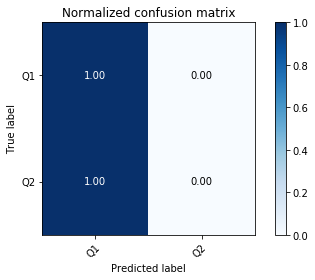

In [6]:
classes = labels
plot_confusion_matrix(y_test, y_pred, classes, normalize=True)